In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('C:\\Users\\VIKHYAT\\Downloads\\train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.drop(['PassengerId' , 'Name'] , inplace=True , axis=1)

In [4]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [5]:
train['HomePlanet'].isnull().sum()

201

In [6]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0] , inplace=True)
train['HomePlanet'].isnull().sum()

0

In [7]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [8]:
train['HomePlanet'].replace(['Europa', 'Earth', 'Mars'] , [1 , 2 , 3] , inplace=True)

In [9]:
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0] , inplace=True)
train['CryoSleep'].replace([True , False] , [1 , 0] , inplace=True)

In [10]:
# train[['C1','C2','C3']] = train['Cabin'].str.split("/" , expand=True , n=3)

In [11]:
# train.head()

In [12]:
# train.columns

In [13]:
train.drop(['Cabin'] , inplace=True , axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,2,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,1,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,2,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [14]:
# train.isnull().sum()

In [15]:
# train['C1'].fillna(train['C1'].mode()[0] , inplace=True)
# train['C2'].fillna(train['C2'].mode()[0] , inplace=True)
# train['C3'].fillna(train['C3'].mode()[0] , inplace=True)

In [16]:
# train['C1'].unique()

In [17]:
# train['C1'].replace(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'] , [1,2,3,4,5,6,7,8] , inplace=True)

In [18]:
# train['C2'].unique()

In [19]:
# train['C3'].unique()

In [20]:
# train['C3'].replace(['P' , 'S'], [ 1,2 ] , inplace=True)

In [21]:
# train.head()

In [22]:
train['Destination'].fillna(train['Destination'].mode()[0] , inplace=True)
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [23]:
train['Destination'].replace(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'] , [1,2,3] , inplace=True)

In [24]:
train['Age'].fillna(train['Age'].mean() , inplace=True)

In [25]:
train['VIP'].fillna(train['VIP'].mode()[0] , inplace=True)
train['VIP'].replace([True , False] , [ 1 ,0] , inplace=True)

<AxesSubplot:xlabel='RoomService', ylabel='Density'>

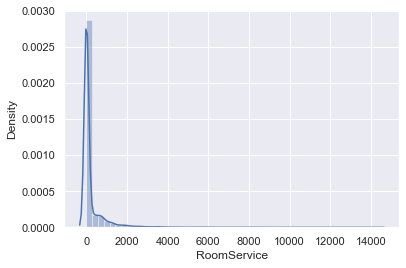

In [26]:
sns.distplot(train['RoomService'])

<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

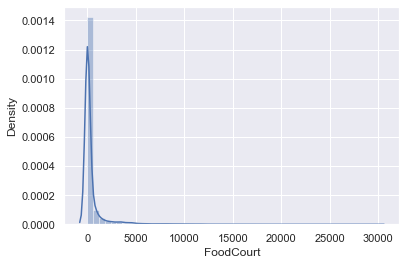

In [27]:
sns.distplot(train['FoodCourt'])

<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

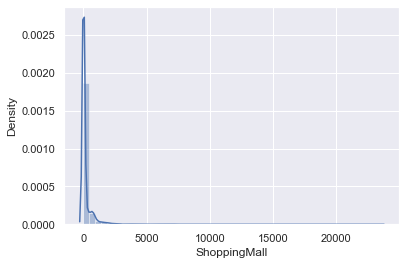

In [28]:
sns.distplot(train['ShoppingMall'])

<AxesSubplot:xlabel='Spa', ylabel='Density'>

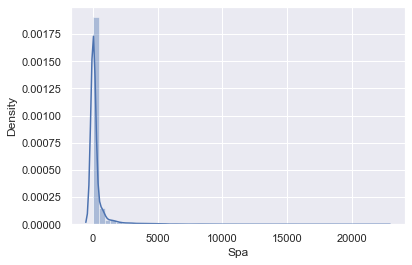

In [29]:
sns.distplot(train['Spa'])

In [30]:
train['RoomService'].fillna(train['RoomService'].median() , inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].median() , inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].median() , inplace=True)
train['Spa'].fillna(train['Spa'].median() , inplace=True)

<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

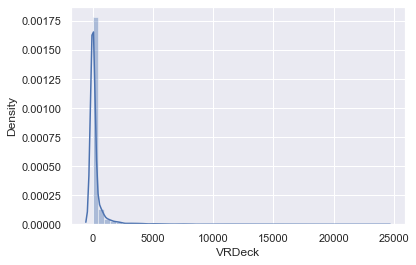

In [31]:
sns.distplot(train['VRDeck'])

In [32]:
train['VRDeck'].fillna(train['VRDeck'].median() , inplace=True)

In [33]:
train_ans = train['Transported']
train_ans

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [34]:
train['Transported'].replace([True , False] , [1 ,0] , inplace=True)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,2,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,2,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [35]:
# train['C2'] = train['C2'].astype(int)
# train['C2'].dtype

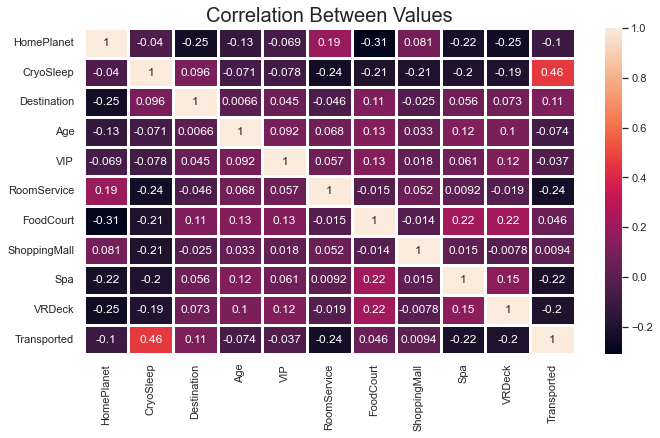

In [36]:
plt.figure(figsize = (11,6))                                                         # CORRELATION USING CORR METHOD

sns.heatmap(train.corr(),annot = True, linewidth = 3)                                  # CREATING HEATMAP WITH PARAMETERS

plt.title('Correlation Between Values',fontsize = 20)
plt.show()

In [37]:
train.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,-0.040494,-0.246953,-0.130438,-0.068536,0.190514,-0.310342,0.080826,-0.224423,-0.249392,-0.102240
CryoSleep,-0.040494,1.000000,0.096287,-0.070736,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132
Destination,-0.246953,0.096287,1.000000,0.006619,0.044707,-0.045733,0.111057,-0.024721,0.055815,0.073293,0.108152
Age,-0.130438,-0.070736,0.006619,1.000000,0.091574,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249
VIP,-0.068536,-0.078281,0.044707,0.091574,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,0.190514,-0.244089,-0.045733,0.068425,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,-0.310342,-0.205928,0.111057,0.127343,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.080826,-0.207798,-0.024721,0.032846,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,-0.224423,-0.198307,0.055815,0.121071,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,-0.249392,-0.192721,0.073293,0.099551,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874


In [38]:
to_drop = ['VIP' ,'ShoppingMall']
train.drop(to_drop , inplace=True , axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,Spa,VRDeck,Transported
0,1,0,1,39.0,0.0,0.0,0.0,0.0,0
1,2,0,1,24.0,109.0,9.0,549.0,44.0,1
2,1,0,1,58.0,43.0,3576.0,6715.0,49.0,0
3,1,0,1,33.0,0.0,1283.0,3329.0,193.0,0
4,2,0,1,16.0,303.0,70.0,565.0,2.0,1


In [39]:
train.drop(['Transported'] , inplace=True , axis=1)

In [40]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC

In [90]:
clf = LogisticRegression(class_weight='balanced')
clf1 = XGBClassifier()
clf2 = SVC(probability=True)

In [91]:
# clf.fit(train , train_ans)
clf1.fit(train , train_ans)
# clf2.fit(train , train_ans)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [92]:
# print(clf.score(train ,train_ans),
print(clf1.score(train ,train_ans))
# clf2.score(train ,train_ans))

0.8596571954446106


In [44]:
test_data = pd.read_csv('C:\\Users\\VIKHYAT\\Downloads\\test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [45]:
test_data.drop(['PassengerId' , 'Name'] , inplace=True , axis=1)
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0] , inplace=True)
test_data['HomePlanet'].replace(['Europa', 'Earth', 'Mars'] , [1 , 2 , 3] , inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0] , inplace=True)
test_data['CryoSleep'].replace([True , False] , [1 , 0] , inplace=True)
test_data['Age'].fillna(test_data['Age'].mean() , inplace=True)
test_data['Destination'].fillna(test_data['Destination'].mode()[0] , inplace=True)
test_data['Destination'].replace(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'] , [1,2,3] , inplace=True)
test_data['FoodCourt'].fillna(test_data['FoodCourt'].median() , inplace=True)
test_data['RoomService'].fillna(test_data['RoomService'].median() , inplace=True)
test_data['Spa'].fillna(test_data['Spa'].median() , inplace=True)
test_data['VRDeck'].fillna(test_data['VRDeck'].median() , inplace=True)
to_drop1 = ['VIP' ,'ShoppingMall' , 'Cabin']
test_data.drop(to_drop1 , inplace=True , axis=1)


In [46]:
test_data.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
RoomService    0
FoodCourt      0
Spa            0
VRDeck         0
dtype: int64

In [47]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,Spa,VRDeck
0,2,1,1,27.0,0.0,0.0,0.0,0.0
1,2,0,1,19.0,0.0,9.0,2823.0,0.0
2,1,1,3,31.0,0.0,0.0,0.0,0.0
3,1,0,1,38.0,0.0,6652.0,181.0,585.0
4,2,0,1,20.0,10.0,0.0,0.0,0.0


In [48]:
predicted = clf.predict(test_data)
predicted1 = clf1.predict(test_data)
predicted2 = clf2.predict(test_data)

In [49]:
predicted = pd.DataFrame(predicted , columns=['predicted'])
predicted1 = pd.DataFrame(predicted1 , columns=['predicted1'])
predicted2= pd.DataFrame(predicted2 , columns=['predicted2'])

In [50]:
t_data = pd.read_csv('C:\\Users\\VIKHYAT\\Downloads\\test.csv')
pass_data = t_data['PassengerId']
pass_data

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [51]:
pass_data = pass_data.to_frame()

In [52]:
pass_data['Transported']=predicted['predicted']
pass_data['Transported'].replace([1 , 0] , [True , False] , inplace=True)
pass_data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [53]:
pass1_data = pass_data.copy()
pass1_data['Transported']=predicted1['predicted1']
pass1_data['Transported'].replace([1 , 0] , [True , False] , inplace=True)
pass1_data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [54]:
pass2_data = pass_data.copy()
pass2_data['Transported']=predicted2['predicted2']
pass2_data['Transported'].replace([1 , 0] , [True , False] , inplace=True)
pass2_data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [55]:
pass_data.to_csv('C:\\Users\\VIKHYAT\\Downloads\\logi3.csv' , index=False)
pass1_data.to_csv('C:\\Users\\VIKHYAT\\Downloads\\xgb3.csv' , index=False)
pass2_data.to_csv('C:\\Users\\VIKHYAT\\Downloads\\svc3.csv' , index=False)